### Improving data quality

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import tensorflow as tf
from datetime import datetime
import seaborn as sns

### Reading the dataset

In [89]:
df= pd.read_csv("data/vehicle-fuel-type-count-by-zip-code.csv")
df.head()

/var/folders/0_/g1skcxw97pn3d3p68j0_rzg40000gn/T/ipykernel_47664/2765416341.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("data/vehicle-fuel-type-count-by-zip-code.csv")


,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,10/1/2018,90000,2006,Gasoline,OTHER/UNK,Light,1
1,10/1/2018,90000,2014,Gasoline,OTHER/UNK,Light,1
2,10/1/2018,90000,2016,Gasoline,OTHER/UNK,Light,1
3,10/1/2018,90000,2017,Gasoline,OTHER/UNK,Light,1
4,10/1/2018,90000,<2006,Diesel and Diesel Hybrid,OTHER/UNK,Heavy,55


### Let's check a summary of the dataframe

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586233 entries, 0 to 586232
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Date        586233 non-null  object
 1   Zip Code    586233 non-null  object
 2   Model Year  586233 non-null  object
 3   Fuel        586233 non-null  object
 4   Make        586233 non-null  object
 5   Duty        586233 non-null  object
 6   Vehicles    586233 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.3+ MB


### Checking out the statistics of the given dataset

In [91]:
df.describe()

,Vehicles
count,586233.000000
mean,53.115389
std,176.762188
min,1.000000
25%,12.000000
50%,21.000000
75%,48.000000
max,32657.000000


### Let's use groupby function to split data on basis of Fuel feature

In [92]:
df.groupby('Fuel').first()

,Date,Zip Code,Model Year,Make,Duty,Vehicles
Fuel,,,,,,
Battery Electric,10/1/2018,90000,<2006,OTHER/UNK,Heavy,4
Diesel and Diesel Hybrid,10/1/2018,90000,<2006,OTHER/UNK,Heavy,55
Flex-Fuel,10/1/2018,90001,2006,CHEVROLET,Light,41
Gasoline,10/1/2018,90000,2006,OTHER/UNK,Light,1
Hybrid Gasoline,10/1/2018,90001,2006,OTHER/UNK,Light,12
Hydrogen Fuel Cell,10/1/2018,90003,2016,OTHER/UNK,Light,1
Natural Gas,10/1/2018,90001,2006,OTHER/UNK,Light,1
Other,10/1/2018,90000,<2006,OTHER/UNK,Light,6
Plug-in Hybrid,10/1/2018,90001,2012,OTHER/UNK,Light,1


### Checking for null values

In [93]:
df.isnull().sum()

Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Duty          0
Vehicles      0
dtype: int64

### Summarizing the data

In [94]:
print(f'Rows: {df.shape[0]}\nColumns: {df.shape[1]}\nUnique Values: {df.nunique()}\nList of Columns:{df.columns.tolist()}\nMissing Values: {df.isnull().sum().values.sum()}')

Rows: 586233
Columns: 7
Unique Values: Date             1
Zip Code      2918
Model Year      15
Fuel             9
Make           115
Duty             2
Vehicles      2445
dtype: int64
List of Columns:['Date', 'Zip Code', 'Model Year', 'Fuel', 'Make', 'Duty', 'Vehicles']
Missing Values: 0


### Last 5 Entries of the dataset

In [95]:
df.tail()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
586228,10/1/2018,Other,<2006,Hybrid Gasoline,TOYOTA,Light,54
586229,10/1/2018,Other,<2006,Natural Gas,OTHER/UNK,Heavy,4
586230,10/1/2018,Other,<2006,Natural Gas,OTHER/UNK,Light,6
586231,10/1/2018,Other,<2006,Other,OTHER/UNK,Heavy,1
586232,10/1/2018,Other,<2006,Other,OTHER/UNK,Light,8


#### Luckily we don't have any missing values

### Data Quality Issue 1: Incorrect format of the Date feature

In [96]:
df['Date']=pd.to_datetime(df['Date'],format='%m/%d/%Y')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586233 entries, 0 to 586232
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        586233 non-null  datetime64[ns]
 1   Zip Code    586233 non-null  object        
 2   Model Year  586233 non-null  object        
 3   Fuel        586233 non-null  object        
 4   Make        586233 non-null  object        
 5   Duty        586233 non-null  object        
 6   Vehicles    586233 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 31.3+ MB


In [98]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586233 entries, 0 to 586232
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        586233 non-null  datetime64[ns]
 1   Zip Code    586233 non-null  object        
 2   Model Year  586233 non-null  object        
 3   Fuel        586233 non-null  object        
 4   Make        586233 non-null  object        
 5   Duty        586233 non-null  object        
 6   Vehicles    586233 non-null  int64         
 7   year        586233 non-null  int64         
 8   month       586233 non-null  int64         
 9   day         586233 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 44.7+ MB


In [100]:
df.head()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles,year,month,day
0,2018-10-01,90000,2006,Gasoline,OTHER/UNK,Light,1,2018,10,1
1,2018-10-01,90000,2014,Gasoline,OTHER/UNK,Light,1,2018,10,1
2,2018-10-01,90000,2016,Gasoline,OTHER/UNK,Light,1,2018,10,1
3,2018-10-01,90000,2017,Gasoline,OTHER/UNK,Light,1,2018,10,1
4,2018-10-01,90000,<2006,Diesel and Diesel Hybrid,OTHER/UNK,Heavy,55,2018,10,1


### Fixing the column names

In [106]:
df = df.rename(columns={'Date':'date','Model Year':'modelyear','Zip Code':'zipcode','Fuel':'fuel','Make':'make','Duty':'duty','Vehicles':'vehicles'})
df.head()

,date,zipcode,modelyear,fuel,make,duty,vehicles,year,month,day
0,2018-10-01,90000,2006,Gasoline,OTHER/UNK,Light,1,2018,10,1
1,2018-10-01,90000,2014,Gasoline,OTHER/UNK,Light,1,2018,10,1
2,2018-10-01,90000,2016,Gasoline,OTHER/UNK,Light,1,2018,10,1
3,2018-10-01,90000,2017,Gasoline,OTHER/UNK,Light,1,2018,10,1
4,2018-10-01,90000,<2006,Diesel and Diesel Hybrid,OTHER/UNK,Heavy,55,2018,10,1


### Removing <2006 values

In [112]:
df = df.loc[df.modelyear != '<2006'].copy()
df['modelyear'].value_counts()

2017    46834
2016    45530
2015    44685
2014    41992
2013    41361
2012    38901
2006    37466
2018    36564
2007    35756
2008    34928
2011    34663
2010    30585
2009    27628
2019     4978
Name: modelyear, dtype: int64

### Let's visualize the relationship between number of vehicles yearly

<Figure size 2000x600 with 0 Axes>

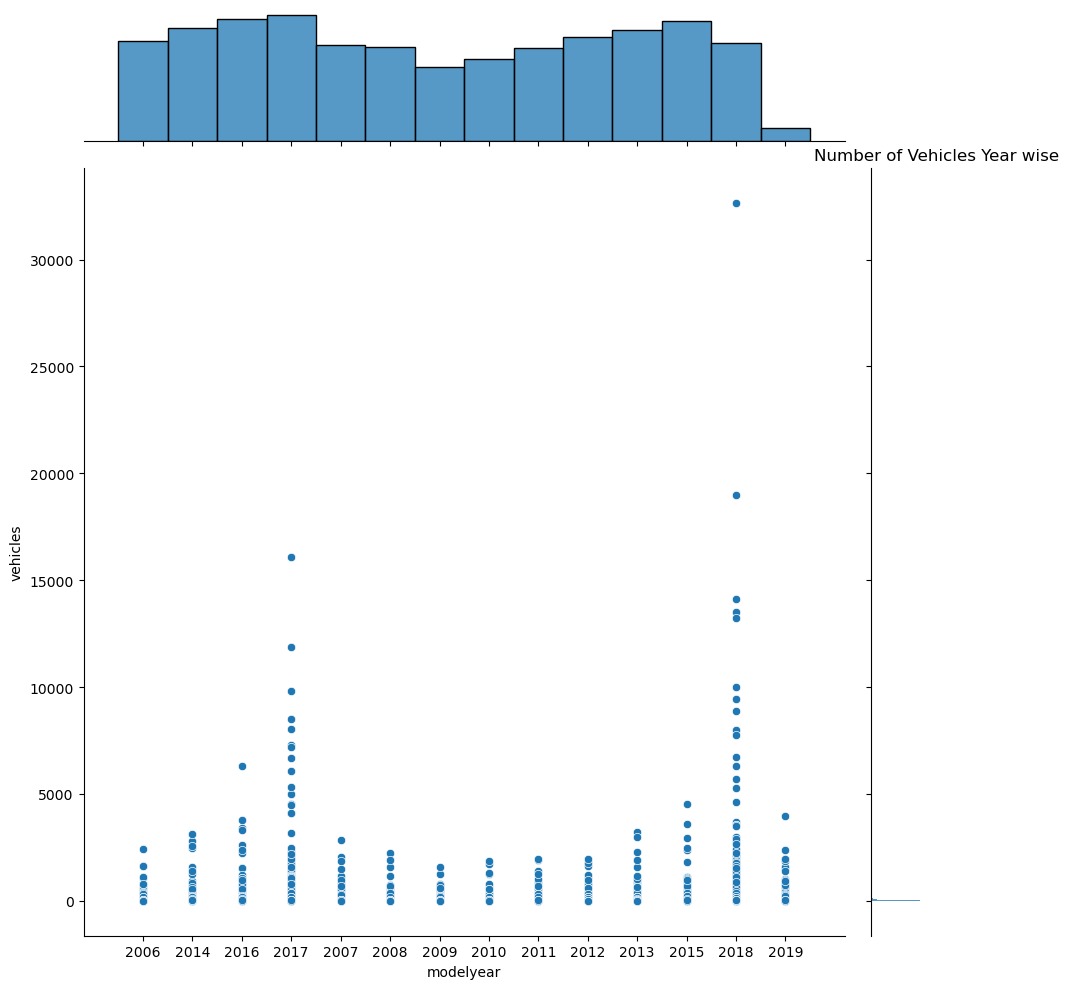

In [115]:
plt.figure(figsize=(20,6))
sns.jointplot(x='modelyear',y='vehicles',data=df,height=10)
plt.xticks(rotation=45)
plt.title('Number of Vehicles Year wise')
plt.show()

### Handling Categorical Values using one hot encoding

In [121]:
data_dummy = pd.get_dummies(df[['fuel','make','duty']],drop_first=True)
data_dummy.head()

,fuel_Diesel and Diesel Hybrid,fuel_Flex-Fuel,fuel_Gasoline,fuel_Hybrid Gasoline,fuel_Hydrogen Fuel Cell,fuel_Natural Gas,fuel_Other,fuel_Plug-in Hybrid,make_ALFA ROMEO,make_ALLIANZ,...,make_TOMBERLIN,make_TOYOTA,make_UD TRUCKS,make_VAN HOOL,make_VOLKSWAGEN,make_VOLVO,make_VPG,make_WESTERN STAR,make_WORKHORSE,duty_Light
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df = pd.concat([df,data_dummy], axis=1)
df.head()

,date,zipcode,modelyear,fuel,make,duty,vehicles,year,month,day,...,make_TOMBERLIN,make_TOYOTA,make_UD TRUCKS,make_VAN HOOL,make_VOLKSWAGEN,make_VOLVO,make_VPG,make_WESTERN STAR,make_WORKHORSE,duty_Light
0,2018-10-01,90000,2006,Gasoline,OTHER/UNK,Light,1,2018,10,1,...,0,0,0,0,0,0,0,0,0,1
1,2018-10-01,90000,2014,Gasoline,OTHER/UNK,Light,1,2018,10,1,...,0,0,0,0,0,0,0,0,0,1
2,2018-10-01,90000,2016,Gasoline,OTHER/UNK,Light,1,2018,10,1,...,0,0,0,0,0,0,0,0,0,1
3,2018-10-01,90000,2017,Gasoline,OTHER/UNK,Light,1,2018,10,1,...,0,0,0,0,0,0,0,0,0,1
16,2018-10-01,90001,2006,Diesel and Diesel Hybrid,FORD,Heavy,16,2018,10,1,...,0,0,0,0,0,0,0,0,0,0


In [130]:
df=df.drop(['date','duty'], axis=1)
df.head()

,vehicles,year,month,day,fuel_Diesel and Diesel Hybrid,fuel_Flex-Fuel,fuel_Gasoline,fuel_Hybrid Gasoline,fuel_Hydrogen Fuel Cell,fuel_Natural Gas,...,make_TOMBERLIN,make_TOYOTA,make_UD TRUCKS,make_VAN HOOL,make_VOLKSWAGEN,make_VOLVO,make_VPG,make_WESTERN STAR,make_WORKHORSE,duty_Light
0,1,2018,10,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2018,10,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,2018,10,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,2018,10,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16,16,2018,10,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
